In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
import os
import pandas as pd
from fbprophet import Prophet
import numpy as np

# Data Load

## Using os package

In [155]:
p = os.getcwd()
print(p)

/content


In [156]:
os.listdir(p)

['.config',
 'drive',
 'fbprophet_RMSE.xlsx',
 'fbprophet_MAPE.xlsx',
 'fbprophet_predict.csv',
 'fbprophet_predict.xlsx',
 'sample_data']

In [157]:
data_dir = os.path.join(os.getcwd(), "drive", "MyDrive", "Multi", "Data")
data_dir

'/content/drive/MyDrive/Multi/Data'

In [158]:
# os.path의 is file method.
# 해당 경로가 파일인지 확인하는 method. 비슷한 method로 isdir 등이 있다.
f_names = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
f_names

['/content/drive/MyDrive/Multi/Data/경기도.csv']

In [159]:
os.listdir(data_dir)

['경기도.csv']

## Opening csv data file

In [160]:
data = pd.read_csv(f_names[0], encoding='cp949')
data.head()

,date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
0,2013-01-01,63.4,67.8,77.7,60.5,68.1,53.0,92.6,92.6,66.8,...,68.8,82.3,89.2,92.6,71.1,73.0,82.4,82.0,93.6,102.8
1,2013-02-01,63.3,67.2,77.4,60.2,67.7,52.9,92.5,90.9,66.6,...,68.5,81.9,89.4,92.8,70.9,72.9,82.0,81.7,93.6,102.8
2,2013-03-01,63.2,66.9,76.9,60.0,67.4,52.6,92.4,90.1,66.3,...,68.4,81.6,89.7,92.8,70.8,72.8,81.9,81.4,93.6,102.7
3,2013-04-01,63.3,67.1,76.4,59.8,67.4,52.6,92.4,90.0,66.3,...,68.4,80.6,90.1,93.5,70.7,73.2,82.3,81.7,93.9,102.7
4,2013-05-01,63.4,67.5,76.4,59.6,67.6,52.9,92.4,89.8,66.6,...,68.5,80.7,90.4,93.8,71.0,73.6,82.3,81.9,94.7,103.6


In [161]:
data.tail()

,date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
106,2021-11-01,109.5,104.8,107.2,111.7,110.2,107.3,113.2,107.7,110.7,...,107.1,106.9,110.3,114.8,105.3,111.6,107.9,109.5,108.4,106.6
107,2021-12-01,109.8,105.1,107.4,112.0,110.8,107.4,114.1,107.5,111.2,...,107.5,107.2,112.3,116.1,105.6,111.6,108.4,109.8,109.0,107.2
108,2022-01-01,109.8,105.1,107.4,111.8,110.8,107.3,114.3,107.5,111.3,...,107.6,107.5,113.3,116.9,105.6,111.5,108.7,109.8,109.2,107.1
109,2022-02-01,109.6,105.0,107.3,111.6,110.7,107.3,114.3,107.4,111.3,...,107.4,107.8,114.2,117.0,105.6,111.0,108.7,109.7,109.3,107.1
110,2022-03-01,109.4,105.0,107.3,111.2,110.6,107.2,114.4,107.4,111.2,...,107.1,108.0,115.5,117.5,105.6,110.4,108.5,109.8,109.3,107.1


# FaceBook PROPHET Basic

## Format the Data

In [ ]:
df = data[['date', '수원시']]

In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Create and Fit Model

In [ ]:
prediction_size = 12
train = df[:-prediction_size]
test = df[-prediction_size:]

In [ ]:
m = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.01)
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


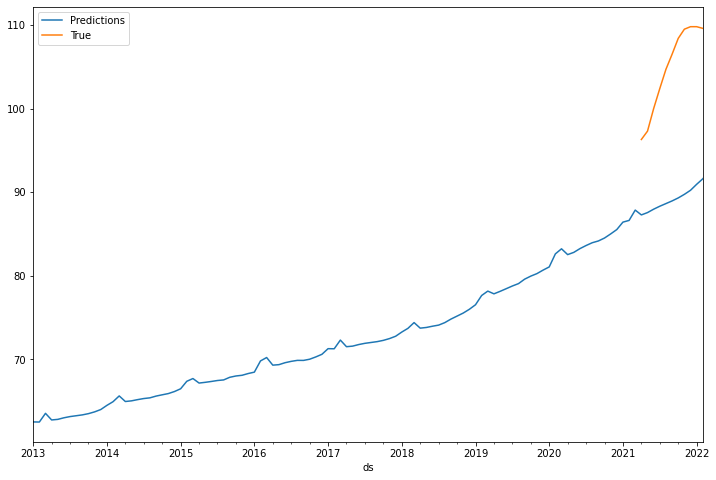

In [ ]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True',legend=True,ax=ax,xlim=('2013-01-01','2022-02-01'))

In [ ]:
m = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.05)
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


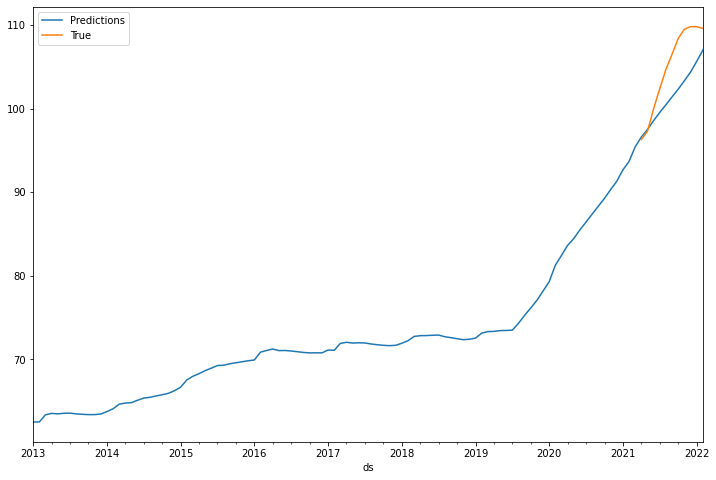

In [ ]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True',legend=True,ax=ax,xlim=('2013-01-01','2022-02-01'))

In [ ]:
df.head()

,ds,y
0,2013-01-01,63.4
1,2013-02-01,63.3
2,2013-03-01,63.2
3,2013-04-01,63.3
4,2013-05-01,63.4


### Step 1: Create "future" placeholder dataframe

In [ ]:
df.tail()

,ds,y
106,2021-11-01,109.5
107,2021-12-01,109.8
108,2022-01-01,109.8
109,2022-02-01,109.6
110,2022-03-01,109.4


In [ ]:
future.tail()

,ds
106,2021-11-01
107,2021-12-01
108,2022-01-01
109,2022-02-01
110,2022-03-01


In [ ]:
len(df)

111

In [ ]:
len(future)


111

### Step 2: Predict and fill in the Future

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,62.792850,61.349810,63.641881,62.792850,62.792850,-0.290192,-0.290192,-0.290192,-0.290192,-0.290192,-0.290192,0.0,0.0,0.0,62.502658
1,2013-02-01,62.906792,61.353407,63.596222,62.906792,62.906792,-0.392594,-0.392594,-0.392594,-0.392594,-0.392594,-0.392594,0.0,0.0,0.0,62.514198
2,2013-03-01,63.009708,62.245256,64.454429,63.009708,63.009708,0.359520,0.359520,0.359520,0.359520,0.359520,0.359520,0.0,0.0,0.0,63.369227
3,2013-04-01,63.123649,62.457728,64.630253,63.123649,63.123649,0.412592,0.412592,0.412592,0.412592,0.412592,0.412592,0.0,0.0,0.0,63.536241
4,2013-05-01,63.233916,62.347959,64.584569,63.233916,63.233916,0.249855,0.249855,0.249855,0.249855,0.249855,0.249855,0.0,0.0,0.0,63.483771


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
106,2021-11-01,103.845945,102.026082,104.667865,103.274092,104.459681,-0.519650,-0.519650,-0.519650,-0.519650,-0.519650,-0.519650,0.0,0.0,0.0,103.326295
107,2021-12-01,104.919630,102.966420,105.690988,104.236566,105.644281,-0.557684,-0.557684,-0.557684,-0.557684,-0.557684,-0.557684,0.0,0.0,0.0,104.361945
108,2022-01-01,106.029104,104.181835,107.099158,105.221589,106.877830,-0.385581,-0.385581,-0.385581,-0.385581,-0.385581,-0.385581,0.0,0.0,0.0,105.643523
109,2022-02-01,107.138579,105.525482,108.511760,106.191831,108.160908,-0.163646,-0.163646,-0.163646,-0.163646,-0.163646,-0.163646,0.0,0.0,0.0,106.974933
110,2022-03-01,108.140685,106.719162,109.952085,107.052871,109.314487,0.289842,0.289842,0.289842,0.289842,0.289842,0.289842,0.0,0.0,0.0,108.430527


In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
99,2021-04-01,96.599583,95.465791,97.734443
100,2021-05-01,97.510531,96.344376,98.660656
101,2021-06-01,98.570704,97.409810,99.666250
102,2021-07-01,99.550700,98.393763,100.824201
103,2021-08-01,100.459606,99.298631,101.666762
104,2021-09-01,101.405926,100.320060,102.660364
105,2021-10-01,102.330707,101.065496,103.648294
106,2021-11-01,103.326295,102.026082,104.667865
107,2021-12-01,104.361945,102.966420,105.690988
108,2022-01-01,105.643523,104.181835,107.099158


### Plotting Forecast

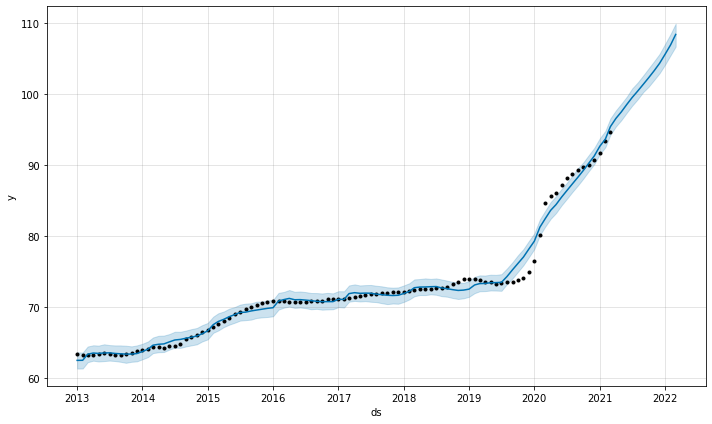

In [ ]:
m.plot(forecast);

ConversionError: ignored

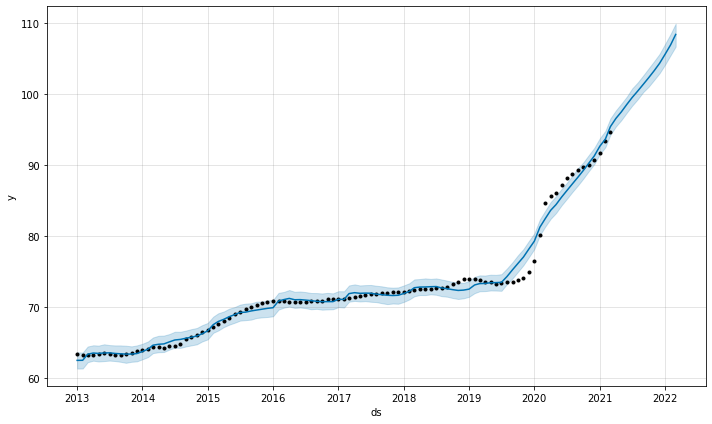

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(forecast)
plt.xlim('2013-01-01','2022-02-01');

In [ ]:
forecast.plot(x='ds',y='yhat');

In [ ]:
m.plot_components(forecast);


In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## Uncertainty Intervals
changepoint_prior_scale을 조절하면 예측 불확실성이 증가함

interval_width의 기본 값은 80%

### Uncertainty in the trend

In [ ]:
#forecast = Prophet(interval_width=0.95).fit(df).predict(future)

### Uncertainty in seasonality

시즈널리티의 불확실성을 알기 위해 베이지안 샘플링을 사용해야 함

mcmc.samples 파라미터를 사용. 이 값을 사용하면 최초 n일에 대해 적용한다는 뜻

In [ ]:
#m = Prophet(mcmc_samples=300)
#forecast = m.fit(df).predict(future)
#fig = m.plot_components(forecast)

## Outliers

너무 튀는 값이 존재해서 예측할 때 영향이 미치므로 제외하고 예측해야 함 ->NA, None로 설정

In [ ]:
# df.loc[(df['ds'] > '2015-01-01') & (df['ds'] < '2016-01-01'), 'y'] = None
#  model = Prophet().fit(df)
#  fig = model.plot(model.predict(future))

# Evaluation

## short

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [ ]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [ ]:
cmp_df = make_comparison_dataframe(df, forecast)

cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2013-01-01,62.502658,61.349810,63.641881,63.4
2013-02-01,62.514198,61.353407,63.596222,63.3
2013-03-01,63.369227,62.245256,64.454429,63.2
2013-04-01,63.536241,62.457728,64.630253,63.3
2013-05-01,63.483771,62.347959,64.584569,63.4


In [ ]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [ ]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 3.069087923722808
MAE 3.296270758557989


## fbprophet.diagnostics

In [ ]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [ ]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-03-01 00:00:00 and 2020-03-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-01,76.357804,75.192022,77.530836,85.7,2020-03-01
1,2020-05-01,76.496160,75.346241,77.663550,86.1,2020-03-01
2,2020-06-01,76.715215,75.513562,77.812491,87.2,2020-03-01
3,2020-07-01,76.909156,75.720571,78.016474,88.2,2020-03-01
4,2020-08-01,77.179184,75.987649,78.316468,88.8,2020-03-01


In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
7,2020-11-01,78.143327,76.838889,79.340327,90.1,2020-03-01
8,2020-12-01,78.255548,77.009349,79.527168,90.7,2020-03-01
9,2021-01-01,78.442796,77.246393,79.669958,91.7,2020-03-01
10,2021-02-01,78.073912,76.845748,79.341413,93.4,2020-03-01
11,2021-03-01,80.518448,79.165981,81.718827,94.7,2020-03-01


In [ ]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,87.276630,9.342196,9.342196,0.109010,0.109010,0.0
1,61 days,92.233739,9.603840,9.603840,0.111543,0.111543,0.0
2,92 days,109.930724,10.484785,10.484785,0.120238,0.120238,0.0
3,122 days,127.483161,11.290844,11.290844,0.128014,0.128014,0.0
4,153 days,135.043374,11.620816,11.620816,0.130865,0.130865,0.0
5,184 days,139.448142,11.808816,11.808816,0.132238,0.132238,0.0
6,214 days,141.076890,11.877579,11.877579,0.132414,0.132414,0.0
7,245 days,142.962039,11.956673,11.956673,0.132704,0.132704,0.0
8,275 days,154.864384,12.444452,12.444452,0.137205,0.137205,0.0
9,306 days,175.753451,13.257204,13.257204,0.144571,0.144571,0.0


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


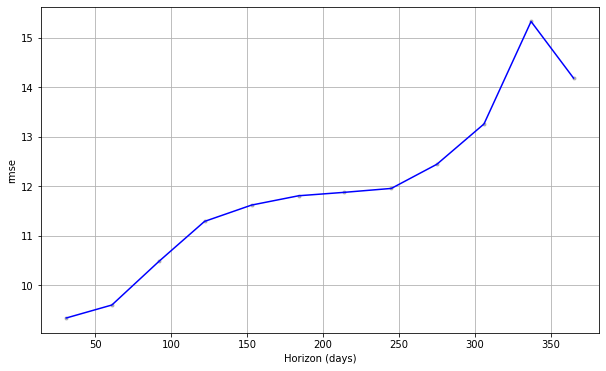

In [ ]:
plot_cross_validation_metric(df_cv, metric='rmse');

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


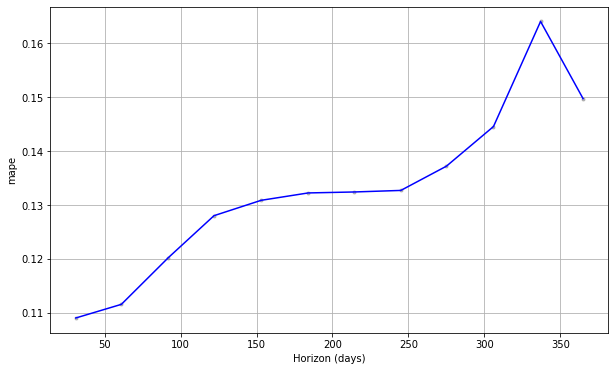

In [ ]:
plot_cross_validation_metric(df_cv, metric='mape');

# 전체 Data

## 동적변수 생성

In [162]:
data.columns

Index(['date', '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시', '안산시',
       '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시',
       '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시'],
      dtype='object')

In [163]:
# prophet 사용위해 동적변수 생성
for i in range(1,29):
  df = data[['date', data.columns[i]]]
  df.columns = ['ds','y']
  df['ds'] = pd.to_datetime(df['ds'])
  globals()['df%d'%i] = df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Create and Fit Model

In [164]:
# split
ratio = 0.7
prediction_size = int(len(df)*ratio)

In [165]:
prediction_size

77

In [166]:
# train, test 동적변수로 돌리기
for i in range(1,29):
  new = globals()['df%d'%i]
  train = new[:prediction_size]
  test = new[prediction_size:]
  globals()['train%d'%i] = train
  globals()['test%d'%i] = test

In [167]:
# train1~train28 학습
for i in range(1,29):
  ht = globals()['train%d'%i]
  m = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.05)
  m.fit(ht)
  future = m.make_future_dataframe(periods=34,freq='MS')
  forecast = m.predict(future)
  globals()['forecast%d'%i] = forecast


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [168]:
forecast28

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,102.679072,102.106338,103.045138,102.679072,102.679072,-0.123824,-0.123824,-0.123824,-0.123824,-0.123824,-0.123824,0.0,0.0,0.0,102.555248
1,2013-02-01,102.862004,102.180679,103.047087,102.862004,102.862004,-0.247921,-0.247921,-0.247921,-0.247921,-0.247921,-0.247921,0.0,0.0,0.0,102.614083
2,2013-03-01,103.027234,102.340696,103.286429,103.027234,103.027234,-0.197243,-0.197243,-0.197243,-0.197243,-0.197243,-0.197243,0.0,0.0,0.0,102.829991
3,2013-04-01,103.210166,102.489984,103.453431,103.210166,103.210166,-0.218504,-0.218504,-0.218504,-0.218504,-0.218504,-0.218504,0.0,0.0,0.0,102.991663
4,2013-05-01,103.387198,102.976522,103.902578,103.387198,103.387198,0.047556,0.047556,0.047556,0.047556,0.047556,0.047556,0.0,0.0,0.0,103.434754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-11-01,94.824191,91.701761,98.527550,91.578890,98.340557,0.122586,0.122586,0.122586,0.122586,0.122586,0.122586,0.0,0.0,0.0,94.946778
107,2021-12-01,94.469622,90.994771,98.237579,91.006959,98.161124,0.008820,0.008820,0.008820,0.008820,0.008820,0.008820,0.0,0.0,0.0,94.478442
108,2022-01-01,94.103234,90.370380,97.708058,90.446036,97.979384,-0.156822,-0.156822,-0.156822,-0.156822,-0.156822,-0.156822,0.0,0.0,0.0,93.946412
109,2022-02-01,93.736846,89.704688,97.477607,89.977939,97.771711,-0.213815,-0.213815,-0.213815,-0.213815,-0.213815,-0.213815,0.0,0.0,0.0,93.523031


## forecast 추출

In [169]:
for i in range (1,29):
  ht2 = globals()['forecast%d'%i]
  globals()['predict%d'%i] = ht2[['ds', 'yhat']]

In [170]:
from functools import reduce

In [171]:
# merge 동적변수로 해보기
#for i in range (1,29):
#  this.merge(globals()['predict%d'%i], globals()['pred%d'%i], on "ds")

In [172]:
ht5 = [predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9, predict10, predict11, predict12, predict13, predict14, predict15, predict16, predict17, predict18, predict19, predict20, predict21, predict22, predict23, predict24, predict25, predict26, predict27, predict28]
경기도 = reduce(lambda left, right: pd.merge(left, right, on='ds'), ht5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'yhat_x'} in the result is deprecated and will raise a MergeError in a future version.
  


In [173]:
경기도

,ds,yhat_x,yhat_y,yhat_x,yhat_y,yhat_x,yhat_y,yhat_x,yhat_y,yhat_x,...,yhat_x,yhat_y,yhat_x,yhat_y,yhat_x,yhat_y,yhat_x,yhat_y,yhat_x,yhat_y
0,2013-01-01,63.371957,66.839704,77.702614,60.295040,68.023510,52.419997,92.342989,92.495073,66.336499,...,68.846048,82.177484,89.133794,92.527177,71.077800,73.038994,82.263690,81.951080,93.468070,102.555248
1,2013-02-01,63.302664,66.766279,77.360302,60.076141,67.772752,52.134184,92.498226,91.062224,66.535774,...,68.561720,81.779205,89.387541,92.892728,71.034143,72.941912,82.100292,81.774416,93.697110,102.614083
2,2013-03-01,63.330925,67.071351,76.901787,59.935745,67.543849,52.366692,92.512507,90.114848,66.524432,...,68.477829,81.426077,89.688849,92.992251,70.906278,73.028062,82.135726,81.667860,93.809804,102.829991
3,2013-04-01,63.310684,67.070877,76.534627,59.782944,67.401438,52.290175,92.519181,89.944818,66.559417,...,68.380620,80.942033,89.994747,93.407395,70.667208,73.119260,82.213336,81.644556,94.062818,102.991663
4,2013-05-01,63.317524,67.169185,76.301726,59.632205,67.359690,52.379655,92.582037,89.769453,66.650210,...,68.314052,80.663413,90.257838,93.619371,70.604130,73.242798,82.212698,81.644589,94.402936,103.434754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-11-01,77.598729,100.617062,82.613760,81.178166,86.690477,89.336980,68.840363,88.017884,52.947515,...,86.797106,79.461682,92.161847,72.793254,85.843034,81.926604,80.323534,83.903704,87.441586,94.946778
107,2021-12-01,77.777098,100.800811,82.603763,81.285452,86.877658,89.535812,68.333935,87.897020,52.503671,...,87.097174,78.941910,91.852434,72.300575,85.790202,81.895611,80.176551,83.773680,87.129145,94.478442
108,2022-01-01,77.867855,101.287000,82.575362,81.392738,87.024938,89.787141,67.870338,87.762191,52.149771,...,87.335805,78.544207,91.613264,72.028631,85.763578,81.886168,80.183249,83.637784,86.756663,93.946412
109,2022-02-01,77.905250,101.725473,82.562350,81.474431,87.065163,89.900154,67.373590,87.520937,51.649256,...,87.467001,78.321320,91.370486,71.371212,85.736356,81.842216,79.924813,83.463704,86.463049,93.523031


In [174]:
data.columns

Index(['date', '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시', '안산시',
       '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시',
       '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시'],
      dtype='object')

In [175]:
경기도.columns = ['date', '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시', '안산시',
       '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시',
       '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시']

In [176]:
경기도

,date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
0,2013-01-01,63.371957,66.839704,77.702614,60.295040,68.023510,52.419997,92.342989,92.495073,66.336499,...,68.846048,82.177484,89.133794,92.527177,71.077800,73.038994,82.263690,81.951080,93.468070,102.555248
1,2013-02-01,63.302664,66.766279,77.360302,60.076141,67.772752,52.134184,92.498226,91.062224,66.535774,...,68.561720,81.779205,89.387541,92.892728,71.034143,72.941912,82.100292,81.774416,93.697110,102.614083
2,2013-03-01,63.330925,67.071351,76.901787,59.935745,67.543849,52.366692,92.512507,90.114848,66.524432,...,68.477829,81.426077,89.688849,92.992251,70.906278,73.028062,82.135726,81.667860,93.809804,102.829991
3,2013-04-01,63.310684,67.070877,76.534627,59.782944,67.401438,52.290175,92.519181,89.944818,66.559417,...,68.380620,80.942033,89.994747,93.407395,70.667208,73.119260,82.213336,81.644556,94.062818,102.991663
4,2013-05-01,63.317524,67.169185,76.301726,59.632205,67.359690,52.379655,92.582037,89.769453,66.650210,...,68.314052,80.663413,90.257838,93.619371,70.604130,73.242798,82.212698,81.644589,94.402936,103.434754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-11-01,77.598729,100.617062,82.613760,81.178166,86.690477,89.336980,68.840363,88.017884,52.947515,...,86.797106,79.461682,92.161847,72.793254,85.843034,81.926604,80.323534,83.903704,87.441586,94.946778
107,2021-12-01,77.777098,100.800811,82.603763,81.285452,86.877658,89.535812,68.333935,87.897020,52.503671,...,87.097174,78.941910,91.852434,72.300575,85.790202,81.895611,80.176551,83.773680,87.129145,94.478442
108,2022-01-01,77.867855,101.287000,82.575362,81.392738,87.024938,89.787141,67.870338,87.762191,52.149771,...,87.335805,78.544207,91.613264,72.028631,85.763578,81.886168,80.183249,83.637784,86.756663,93.946412
109,2022-02-01,77.905250,101.725473,82.562350,81.474431,87.065163,89.900154,67.373590,87.520937,51.649256,...,87.467001,78.321320,91.370486,71.371212,85.736356,81.842216,79.924813,83.463704,86.463049,93.523031


In [177]:
경기도.tail(3)

,date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
108,2022-01-01,77.867855,101.287000,82.575362,81.392738,87.024938,89.787141,67.870338,87.762191,52.149771,...,87.335805,78.544207,91.613264,72.028631,85.763578,81.886168,80.183249,83.637784,86.756663,93.946412
109,2022-02-01,77.905250,101.725473,82.562350,81.474431,87.065163,89.900154,67.373590,87.520937,51.649256,...,87.467001,78.321320,91.370486,71.371212,85.736356,81.842216,79.924813,83.463704,86.463049,93.523031
110,2022-03-01,77.980517,102.129684,82.488831,81.632804,87.135210,90.033914,66.856249,87.494507,51.190321,...,87.744505,78.157881,91.168954,70.699081,85.728788,81.854215,79.860818,83.430162,86.240308,93.312275


## excel로 저장

In [178]:
경기도.tail()

,date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
106,2021-11-01,77.598729,100.617062,82.613760,81.178166,86.690477,89.336980,68.840363,88.017884,52.947515,...,86.797106,79.461682,92.161847,72.793254,85.843034,81.926604,80.323534,83.903704,87.441586,94.946778
107,2021-12-01,77.777098,100.800811,82.603763,81.285452,86.877658,89.535812,68.333935,87.897020,52.503671,...,87.097174,78.941910,91.852434,72.300575,85.790202,81.895611,80.176551,83.773680,87.129145,94.478442
108,2022-01-01,77.867855,101.287000,82.575362,81.392738,87.024938,89.787141,67.870338,87.762191,52.149771,...,87.335805,78.544207,91.613264,72.028631,85.763578,81.886168,80.183249,83.637784,86.756663,93.946412
109,2022-02-01,77.905250,101.725473,82.562350,81.474431,87.065163,89.900154,67.373590,87.520937,51.649256,...,87.467001,78.321320,91.370486,71.371212,85.736356,81.842216,79.924813,83.463704,86.463049,93.523031
110,2022-03-01,77.980517,102.129684,82.488831,81.632804,87.135210,90.033914,66.856249,87.494507,51.190321,...,87.744505,78.157881,91.168954,70.699081,85.728788,81.854215,79.860818,83.430162,86.240308,93.312275


In [179]:
경기도.to_excel("fbprophet_predict.xlsx")

In [180]:
경기도.to_csv("fbprophet_predict.csv")

## Evaluation

### RMSE

In [181]:
#RMSE(real, pred) = (np.sqrt((real-pred)**2)).mean()

In [193]:
f_pred.head()

,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,고양시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,63.371957,66.839704,77.702614,60.295040,68.023510,52.419997,92.342989,92.495073,66.336499,69.443174,...,68.846048,82.177484,89.133794,92.527177,71.077800,73.038994,82.263690,81.951080,93.468070,102.555248
2013-02-01,63.302664,66.766279,77.360302,60.076141,67.772752,52.134184,92.498226,91.062224,66.535774,68.963581,...,68.561720,81.779205,89.387541,92.892728,71.034143,72.941912,82.100292,81.774416,93.697110,102.614083
2013-03-01,63.330925,67.071351,76.901787,59.935745,67.543849,52.366692,92.512507,90.114848,66.524432,68.547194,...,68.477829,81.426077,89.688849,92.992251,70.906278,73.028062,82.135726,81.667860,93.809804,102.829991
2013-04-01,63.310684,67.070877,76.534627,59.782944,67.401438,52.290175,92.519181,89.944818,66.559417,68.299669,...,68.380620,80.942033,89.994747,93.407395,70.667208,73.119260,82.213336,81.644556,94.062818,102.991663
2013-05-01,63.317524,67.169185,76.301726,59.632205,67.359690,52.379655,92.582037,89.769453,66.650210,68.140527,...,68.314052,80.663413,90.257838,93.619371,70.604130,73.242798,82.212698,81.644589,94.402936,103.434754


In [198]:
f_pred = pd.read_csv("fbprophet_predict.csv", index_col="date")
f_pred.drop(['Unnamed: 0'], axis = 1, inplace = True) 
f_pred = f_pred[77:]

In [199]:
f_real = pd.read_csv(f_names[0], index_col="date", encoding='cp949')
f_real = f_real[77:]

In [200]:
f_RMSE = f_real-f_pred

In [201]:
f_RMSE = np.sqrt(f_RMSE**2)

In [202]:
f_RMSE.mean()

수원시     15.327873
성남시      3.354901
의정부시     9.004693
안양시     11.613173
부천시      8.838623
광명시      8.489109
평택시     17.133274
동두천시     6.321824
안산시     26.878559
고양시     11.135791
과천시      1.803276
구리시      8.632902
남양주시    13.695826
오산시     18.762957
시흥시     15.300845
군포시     16.497779
의왕시     14.167517
하남시      6.226457
용인시      9.344757
파주시     10.901493
이천시      5.961574
안성시     16.184289
김포시      8.511156
화성시     12.343997
광주시     11.279887
양주시      9.105904
포천시      7.370800
여주시      4.173018
dtype: float64

In [203]:
f_RMSE.to_excel("fbprophet_RMSE.xlsx")

### MAPE

In [204]:
#MAPE(real, pred) = ((abs((real-pred)/real))*100).mean()

In [205]:
f_MAPE = (abs(f_real-f_pred))*100

In [206]:
f_MAPE.head()

,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,고양시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
date,,,,,,,,,,,,,,,,,,,,,
2019-06-01,84.697258,486.524617,20.421769,249.597539,84.306115,450.898966,17.305032,6.135788,125.881210,43.221132,...,223.563585,50.583919,212.397570,162.070223,61.464581,154.705765,50.449564,118.998046,64.302566,211.033514
2019-07-01,68.748300,464.878639,19.041733,260.563770,90.763670,291.129932,33.816207,5.962858,203.107461,62.884937,...,248.903990,55.568984,207.769181,194.080896,58.272241,162.906887,38.420942,156.126901,29.815734,217.431840
2019-08-01,59.889926,444.276989,30.879982,259.907748,99.701841,235.379310,34.508481,20.315510,303.488802,102.240444,...,254.614240,52.696321,195.578019,141.809917,18.407468,180.352543,30.267458,173.958498,60.243187,208.820230
2019-09-01,79.543414,473.622214,38.511847,257.014557,97.724505,250.417482,0.594214,50.164187,321.723648,152.065632,...,287.986456,74.361395,187.928818,107.873422,71.122652,203.311933,24.930055,175.436152,41.954704,212.523867
2019-10-01,78.104688,450.447097,24.301516,265.792424,118.927080,206.520245,42.133267,48.910249,358.089528,203.224557,...,331.014312,71.964223,163.395547,115.718526,112.372325,201.592964,47.041097,192.286281,59.167621,225.766364


In [207]:
f_MAPE.mean()

수원시     1532.787312
성남시      335.490092
의정부시     900.469333
안양시     1161.317270
부천시      883.862260
광명시      848.910916
평택시     1713.327406
동두천시     632.182428
안산시     2687.855943
고양시     1113.579112
과천시      180.327608
구리시      863.290173
남양주시    1369.582638
오산시     1876.295691
시흥시     1530.084496
군포시     1649.777947
의왕시     1416.751715
하남시      622.645673
용인시      934.475705
파주시     1090.149306
이천시      596.157364
안성시     1618.428902
김포시      851.115625
화성시     1234.399681
광주시     1127.988737
양주시      910.590380
포천시      737.079955
여주시      417.301784
dtype: float64

In [208]:
f_MAPE.to_excel("fbprophet_MAPE.xlsx")